## Region: Normandie

- look at competition: profit/nonprofit, ratings, size (# of employees)
- possible to poach nurses from other homecare services
- study the population of elderly and the population of nurses

In [70]:
import pandas as pd
import matplotlib.pyplot as plt
import os

In [71]:
# constants
filename = 'dossier_complet.csv'
meta_filename = 'meta_dossier_complet.csv'
filepath = os.path.join('data', 'dossier_complet', filename)
filepath_meta = os.path.join('data', 'dossier_complet', meta_filename)

In [72]:
df = pd.read_csv(filepath, delimiter=';')
df_meta = pd.read_csv(filepath_meta, delimiter=';')

/var/folders/gf/krd86t8n5cqdjlrv032x5d_h0000gn/T/ipykernel_78956/557334823.py:1: DtypeWarning:

Columns (0) have mixed types. Specify dtype option on import or set low_memory=False.

/var/folders/gf/krd86t8n5cqdjlrv032x5d_h0000gn/T/ipykernel_78956/557334823.py:2: DtypeWarning:

Columns (3,7) have mixed types. Specify dtype option on import or set low_memory=False.



In [73]:
df_meta.head()

,COD_VAR,LIB_VAR,LIB_VAR_LONG,COD_MOD,LIB_MOD,TYPE_VAR,LONG_VAR,THEME,SOURCE
0,P20_POP,Population en 2020 (princ),Population en 2020,NaN,NaN,NUM,7,Évolution et structure de la population,"Insee, RP2009, RP2014 et RP2020, géographie au..."
1,P20_POP0014,Pop 0-14 ans en 2020 (princ),Nombre de personnes de 0 à 14 ans en 2020,NaN,NaN,NUM,17,Évolution et structure de la population,"Insee, RP2009, RP2014 et RP2020, géographie au..."
2,P20_POP1529,Pop 15-29 ans en 2020 (princ),Nombre de personnes de 15 à 29 ans en 2020,NaN,NaN,NUM,17,Évolution et structure de la population,"Insee, RP2009, RP2014 et RP2020, géographie au..."
3,P20_POP3044,Pop 30-44 ans en 2020 (princ),Nombre de personnes de 30 à 44 ans en 2020,NaN,NaN,NUM,17,Évolution et structure de la population,"Insee, RP2009, RP2014 et RP2020, géographie au..."
4,P20_POP4559,Pop 45-59 ans en 2020 (princ),Nombre de personnes de 45 à 59 ans en 2020,NaN,NaN,NUM,17,Évolution et structure de la population,"Insee, RP2009, RP2014 et RP2020, géographie au..."


In [76]:
df['CODGEO'] = df['CODGEO'].astype(str)
filtered_data_normandy = df[df['CODGEO'].str.startswith(('14', '27', '50', '61', '76'))]

In [77]:
age_groups = ['P20_POP0014', 'P20_POP1529', 'P20_POP3044', 'P20_POP4559', 'P20_POP6074', 'P20_POP7589', 'P20_POP90P']
custom_labels = ['Ages 0-14', 'Ages 15-29', 'Ages 30-44', 'Ages 45-59', 'Ages 60-74', 'Ages 75-89', 'Ages 90+']


# function to generate population density for different age groups
def generate_density_df(df, age_groups):
    for age_group in age_groups:
        fraction_column = f'fraction_{age_group}'
        df[fraction_column] = df[age_group] / df['P20_POP']

    # Create a new DF with just the fractions
    fractions_df = df[[f'fraction_{age_group}' for age_group in age_groups]]

    return fractions_df


# function to generate pie chart for population density
def plot_density_df(fractions_df, age_groups, custom_labels):
    labels = custom_labels
    colors = plt.cm.Paired(range(len(age_groups)))

    fractions_df.mean().plot(kind='pie', labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
    plt.title('Population Distribution by Age Group')
    plt.axis('equal')  # Equal aspect ratio ensures that the pie chart is circular.
    plt.show()

In [78]:
fractions_df = generate_density_df(filtered_data_normandy, age_groups)

/var/folders/gf/krd86t8n5cqdjlrv032x5d_h0000gn/T/ipykernel_78956/1208702318.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gf/krd86t8n5cqdjlrv032x5d_h0000gn/T/ipykernel_78956/1208702318.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gf/krd86t8n5cqdjlrv032x5d_h0000gn/T/ipykernel_78956/1208702318.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

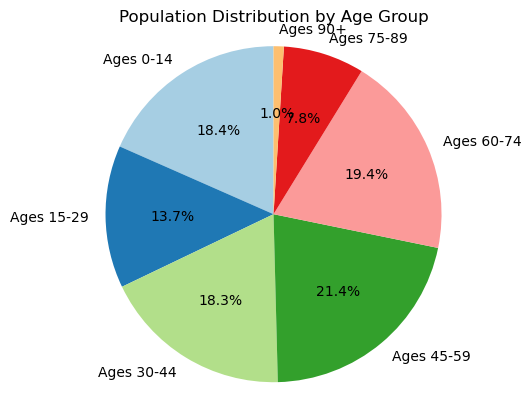

In [79]:
plot_density_df(fractions_df, age_groups, custom_labels)

* calculate density of ages 60+ per department (14, 50, 61)
* calculate density for select groups depending on the labels

In [80]:
df['CODGEO'] = df['CODGEO'].astype(str)
filtered_data_calvados = df[df['CODGEO'].str.startswith(('14'))]
filtered_data_manche = df[df['CODGEO'].str.startswith(('50'))]
filtered_data_orne = df[df['CODGEO'].str.startswith(('61'))]

In [81]:
fractions_df_calvados = generate_density_df(filtered_data_calvados, age_groups)
fractions_df_manche = generate_density_df(filtered_data_manche, age_groups)
fractions_df_orne = generate_density_df(filtered_data_orne, age_groups)

/var/folders/gf/krd86t8n5cqdjlrv032x5d_h0000gn/T/ipykernel_78956/1208702318.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gf/krd86t8n5cqdjlrv032x5d_h0000gn/T/ipykernel_78956/1208702318.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gf/krd86t8n5cqdjlrv032x5d_h0000gn/T/ipykernel_78956/1208702318.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

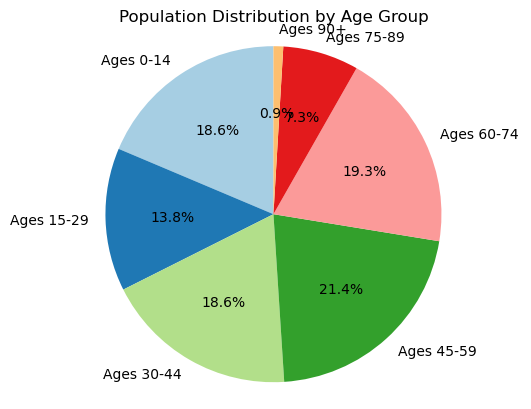

In [82]:
plot_density_df(fractions_df_calvados, age_groups, custom_labels)

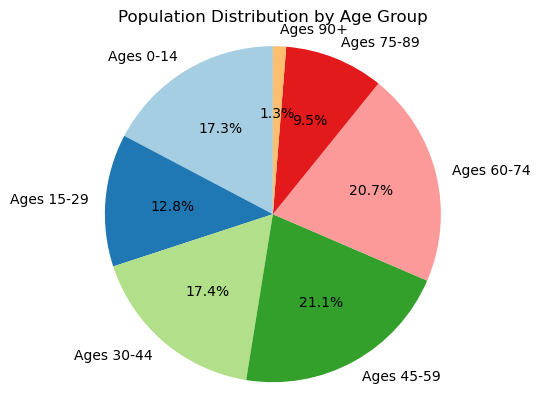

In [83]:
plot_density_df(fractions_df_manche, age_groups, custom_labels)

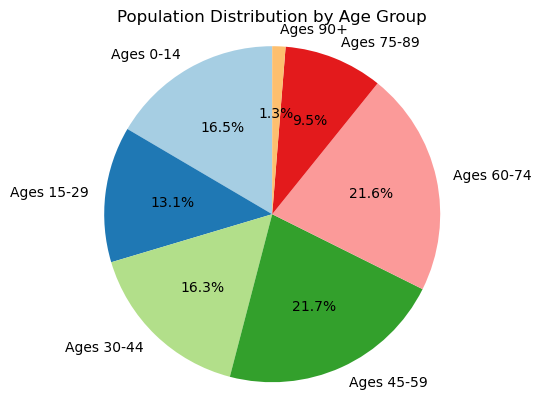

In [84]:
plot_density_df(fractions_df_orne, age_groups, custom_labels)

In [88]:
caen_codes = ['1405', '1406', '1407', '1408', '1409']
rouen_codes = ['7628', '7629', '7630']
havre_codes = ['7614', '7615', '7616', '7617', '7618', '7619']

# Filtering the DataFrame
filtered_df_caen = df[df['CODGEO'].isin(caen_codes)]
fractions_df_caen = generate_density_df(filtered_df_caen, age_groups)

filtered_df_rouen = df[df['CODGEO'].isin(rouen_codes)]
fractions_df_rouen = generate_density_df(filtered_df_rouen, age_groups)

filtered_df_havre = df[df['CODGEO'].isin(havre_codes)]
fractions_df_havre = generate_density_df(filtered_df_havre, age_groups)

/var/folders/gf/krd86t8n5cqdjlrv032x5d_h0000gn/T/ipykernel_78956/1208702318.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gf/krd86t8n5cqdjlrv032x5d_h0000gn/T/ipykernel_78956/1208702318.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gf/krd86t8n5cqdjlrv032x5d_h0000gn/T/ipykernel_78956/1208702318.py:9: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the d

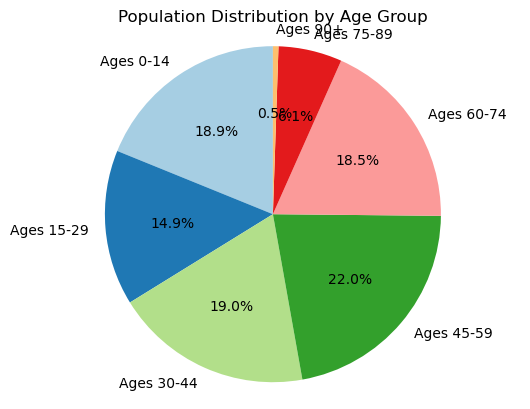

In [89]:
plot_density_df(fractions_df_caen, age_groups, custom_labels)

In [90]:
# create a plot by grouping the calvados, manche, orne arrondissments
# 4 arrondissements dans le département du Calvados
# Bayeux (141)
# Caen (142)
# Lisieux (143)
# Vire (144)

# 4 arrondissements dans le département de la Manche
# Avranches (501)
# Cherbourg (502)
# Coutances (503)
# Saint-Lô (504)

# 3 arrondissements dans le département de l'Orne
# Alençon (611)
# Argentan (612)
# Mortagne-au-Perche (613)

In [91]:
# create a plot that shows old people density for calvados, manche, and orne
# create subplot for each of the 3 departments (by arrondissement)
# optimization to find canton(s) with the most old people (let's try top 15 and bottom 5) for comparison sake

In [92]:
import pandas as pd
import plotly.express as px

# Define area code groups for arrondissments
calvados_area_codes = ['141', '142', '143', '144']
eure_area_codes = ['271', '272', '273']
la_manche_area_codes = ['501', '502', '503', '504']
orne_area_codes = ['611', '612', '613']
seine_maritime_area_codes = ['761', '762', '763']

selected_age_group='75+'

# Function to calculate density for a given DataFrame and area codes
def calculate_density(data_df, age_group='75+'):
    if age_group == '60+':
        columns = ['P20_POP6074', 'P20_POP7589', 'P20_POP90P']
    elif age_group == '75+':
        columns = ['P20_POP7589', 'P20_POP90P']
    elif age_group == '90+':
        columns = ['P20_POP90P']
    else:
        raise ValueError("Invalid age group selection")

    return data_df[columns].sum(axis=1) / data_df['P20_POP'] * 100

# Mapping area codes to names
area_code_names = {
    '141': 'Bayeux',
    '142': 'Caen',
    '143': 'Lisieux',
    '144': 'Vire',
    '271': 'Les Andelys',
    '272': 'Bernay',
    '273': 'Evreux',
    '501': 'Avranches',
    '502': 'Cherbourg',
    '503': 'Coutances',
    '504': 'Saint-Lô',
    '611': 'Alençon',
    '612': 'Argentan',
    '613': 'Mortagne-au-Perche',
    '761': 'Dieppe',
    '762': 'Le Havre',
    '763': 'Rouen'
}

# Create a DataFrame for the area codes and their densities
data = {
    'Area Code': calvados_area_codes + eure_area_codes + la_manche_area_codes + orne_area_codes + seine_maritime_area_codes,
    'Region': ['Calvados'] * len(calvados_area_codes) + ['Eure'] * len(eure_area_codes) + ['La Manche'] * len(la_manche_area_codes) + ['Orne'] * len(orne_area_codes) + ['Seine-Maritime'] * len(seine_maritime_area_codes),
    'Density (%)': []
}

# Calculate density for each area code and append to the DataFrame
for area_code in data['Area Code']:
    area_df = df[df['CODGEO'].astype(str).str.startswith(area_code)]
    area_density = calculate_density(area_df, selected_age_group)
    data['Density (%)'].append(area_density.mean())

# Create a DataFrame from the data dictionary
df_density = pd.DataFrame(data)

# Plot the density using Plotly Express
fig = px.bar(df_density, x='Area Code', y='Density (%)', color='Region', title=f'Density of People Ages {selected_age_group} in Different Arrondissements',
             labels={'Area Code': 'Arrondissement Code', 'Density (%)': 'Density (%)'})

# Update layout
fig.update_layout(
    xaxis=dict(tickangle=-45),
    xaxis_title='Area Codes',
    yaxis_title='Density (%)',
    legend_title='Regions',
    showlegend=True
)

# Show the figure
fig.show()


In [ ]:
## THIS NEEDS TO BE CHANGED !!!!

In [93]:
import pandas as pd

# Sample DataFrame (replace this with your actual data)
df = filtered_data_normandy.copy()

# Function to calculate density for a given DataFrame and area codes
def calculate_density(data_df):
    population_columns = ['P20_POP7589', 'P20_POP90P']
    
    # Check if the total population is zero or missing
    if data_df['P20_POP'].sum() == 0:
        return 0.0
    
    # Calculate density only if the total population is non-zero
    density = data_df[population_columns].sum(axis=1) / data_df['P20_POP'] * 100
    return density.mean()

# Function to find top 10 combinations of 5 consecutive communes with the greatest density of old people
def top_density_combinations(df):
    top_combinations = []
    top_densities = []

    for i in range(len(df) - 4):
        window_df = df.iloc[i:i+5]
        total_density = calculate_density(window_df).mean()
        combination = window_df['CODGEO'].tolist()

        # Insert the combination in sorted order
        insert_index = 0
        while insert_index < len(top_combinations) and total_density < top_densities[insert_index]:
            insert_index += 1

        top_combinations.insert(insert_index, combination)
        top_densities.insert(insert_index, total_density)

        # Keep only the top 10 combinations
        top_combinations = top_combinations[:10]
        top_densities = top_densities[:10]

    return top_combinations, top_densities

# Find the top 10 combinations
top_combinations, top_densities = top_density_combinations(df)

# Print the results
for i, (combination, density) in enumerate(zip(top_combinations, top_densities), 1):
    print(f"Top {i}: Communes {combination} with density {density:.2f}%")


Top 1: Communes ['50029', '50030', '50031', '50032', '50033'] with density 19.85%
Top 2: Communes ['50027', '50028', '50029', '50030', '50031'] with density 19.55%
Top 3: Communes ['5062', '5063', '5064', '5065', '5066'] with density 18.71%
Top 4: Communes ['50028', '50029', '50030', '50031', '50032'] with density 18.60%
Top 5: Communes ['5064', '5065', '5066', '5068', '5070'] with density 17.95%
Top 6: Communes ['6159', '6160', '6161', '6162', '6163'] with density 17.89%
Top 7: Communes ['6156', '6157', '6158', '6159', '6160'] with density 17.88%
Top 8: Communes ['50030', '50031', '50032', '50033', '50034'] with density 17.12%
Top 9: Communes ['50196', '50197', '50198', '50199', '50200'] with density 16.89%
Top 10: Communes ['50026', '50027', '50028', '50029', '50030'] with density 16.73%


In [108]:
## the optimization algorithm above needs to be redone
## need to calculate based on geographic distance between points
df_codes = pd.read_csv('data/code_postal_code_insee_2015public.csv', sep=";")

In [110]:
df_codes.head()

,Geo Point,Geo Shape,ID_GEOFLA,CODE_COM,INSEE_COM,NOM_COM,STATUT,X_CHF_LIEU,Y_CHF_LIEU,X_CENTROID,...,CODE_ARR,CODE_DEPT,NOM_DEPT,CODE_REG,NOM_REG,Nom_commune,Code_postal,Ligne_5,Libellé_d_acheminement,coordonnees_gps
0,"47.01437195152717, 0.3157041445234718","{""coordinates"": [[[0.308170023146216, 46.99992...",COMMUNE00000000000007635,196,37196,RICHELIEU,Commune simple,496727,6660564,496008,...,1.0,37,INDRE-ET-LOIRE,24,CENTRE-VAL DE LOIRE,RICHELIEU,37120.0,NaN,RICHELIEU,"47.014204963, 0.315762618"
1,"45.70528766721012, -0.7948440956985009","{""coordinates"": [[[-0.775148681528635, 45.6928...",COMMUNE00000000000007656,278,17278,PISANY,Commune simple,405884,6518380,404830,...,4.0,17,CHARENTE-MARITIME,75,AQUITAINE-LIMOUSIN-POITOU-CHARENTES,PISANY,17600.0,NaN,PISANY,"45.705135232, -0.7947836140000001"
2,"45.172604816927425, 5.21545397586177","{""coordinates"": [[[5.225640565558654, 45.14621...",COMMUNE00000000000007839,359,38359,SAINT-ANTOINE-L'ABBAYE,Commune simple,874094,6455291,874041,...,1.0,38,ISERE,84,AUVERGNE-RHONE-ALPES,ST ANTOINE L ABBAYE,38160.0,NaN,ST ANTOINE L ABBAYE,"45.184624049, 5.212445683"
3,"48.89029057636954, 6.362501677178978","{""coordinates"": [[[6.355297806937861, 48.87526...",COMMUNE00000000000024101,559,57559,PUZIEUX,Commune simple,946921,6871102,946511,...,2.0,57,MOSELLE,44,ALSACE-CHAMPAGNE-ARDENNE-LORRAINE,PUZIEUX,57590.0,NaN,PUZIEUX,"48.8904713, 6.362597363"
4,"42.57697453656143, 2.2215799461228958","{""coordinates"": [[[2.188124670352984, 42.58754...",COMMUNE00000000000007703,128,66128,OREILLA,Commune simple,638645,6162454,636412,...,3.0,66,PYRENEES-ORIENTALES,76,LANGUEDOC-ROUSSILLON-MIDI-PYRENEES,OREILLA,66360.0,NaN,OREILLA,"42.576225276, 2.2224258470000002"


In [ ]:
## besoin de code_dept = '14', '27', '50', '61', '76'
## code_reg = 28

In [122]:
df_codes_normandie = df_codes[df_codes['CODE_REG'] == 28]

In [123]:
df_codes_normandie.reset_index(inplace=True, drop=True)

In [124]:
df_codes_normandie.head()

,Geo Point,Geo Shape,ID_GEOFLA,CODE_COM,INSEE_COM,NOM_COM,STATUT,X_CHF_LIEU,Y_CHF_LIEU,X_CENTROID,...,CODE_ARR,CODE_DEPT,NOM_DEPT,CODE_REG,NOM_REG,Nom_commune,Code_postal,Ligne_5,Libellé_d_acheminement,coordonnees_gps
0,"49.124912576166246, -0.5746689158949783","{""coordinates"": [[[-0.558297538758859, 49.1123...",COMMUNE00000000000011433,475,14475,NOYERS-BOCAGE,Commune simple,439691,6897295,439147,...,2.0,14,CALVADOS,28,NORMANDIE,VAL D ARRY,14210.0,MISSY,VAL D ARRY,"49.11352574, -0.56798906"
1,"48.46403432324441, 0.73008781087604","{""coordinates"": [[[0.718041860192641, 48.43626...",COMMUNE00000000000025757,50,61050,BOISSY-MAUGIS,Commune simple,530790,6818095,532266,...,3.0,61,ORNE,28,NORMANDIE,COUR MAUGIS SUR HUISNE,61110.0,BOISSY MAUGIS,COUR MAUGIS SUR HUISNE,"48.452514696, 0.7007833920000001"
2,"49.24222324680056, 1.2167199909454787","{""coordinates"": [[[1.206970661792158, 49.25251...",COMMUNE00000000000002746,537,27537,SAINT-ETIENNE-DU-VAUVRAY,Commune simple,570386,6906256,570113,...,1.0,27,EURE,28,NORMANDIE,ST ETIENNE DU VAUVRAY,27430.0,NaN,ST ETIENNE DU VAUVRAY,"49.242421363, 1.216168785"
3,"49.19236769356358, 1.2371643033724244","{""coordinates"": [[[1.26616562651138, 49.204047...",COMMUNE00000000000026613,332,27332,HEUDEBOUVILLE,Commune simple,571639,6900760,571912,...,1.0,27,EURE,28,NORMANDIE,HEUDEBOUVILLE,27400.0,NaN,HEUDEBOUVILLE,"49.192430563, 1.236824538"
4,"48.97381000632265, 1.231691512604371","{""coordinates"": [[[1.242610097182871, 48.95941...",COMMUNE00000000000014049,560,27560,SAINT-LUC,Commune simple,570953,6876327,570540,...,3.0,27,EURE,28,NORMANDIE,ST LUC,27930.0,NaN,ST LUC,"48.973899191, 1.2322973990000001"


In [181]:
df_codes_normandie.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3943 entries, 0 to 3942
Data columns (total 28 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   Geo Point               3943 non-null   object 
 1   Geo Shape               3943 non-null   object 
 2   ID_GEOFLA               3943 non-null   object 
 3   CODE_COM                3943 non-null   int64  
 4   INSEE_COM               3943 non-null   object 
 5   NOM_COM                 3943 non-null   object 
 6   STATUT                  3943 non-null   object 
 7   X_CHF_LIEU              3943 non-null   int64  
 8   Y_CHF_LIEU              3943 non-null   int64  
 9   X_CENTROID              3943 non-null   int64  
 10  Y_CENTROID              3943 non-null   int64  
 11  Z_MOYEN                 3943 non-null   int64  
 12  SUPERFICIE              3943 non-null   int64  
 13  POPULATION              3943 non-null   int64  
 14  CODE_CANT               3943 non-null   

In [261]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler

# Assuming df is your DataFrame with 'Geo Point' column
df_codes_normandie[['latitude', 'longitude']] = df_codes_normandie['Geo Point'].str.split(', ', expand=True).astype(float)

# Scale the features
scaler = StandardScaler()
scaled_features = scaler.fit_transform(df_codes_normandie[['latitude', 'longitude']])

# Choose the number of clusters (e.g., n=5)
n_clusters = 250

# Apply K-means clustering
kmeans = KMeans(n_clusters=n_clusters, random_state=42)
df_codes_normandie['cluster'] = kmeans.fit_predict(scaled_features)

# Visualize the clusters or perform further analysis


/var/folders/gf/krd86t8n5cqdjlrv032x5d_h0000gn/T/ipykernel_78956/4263953894.py:6: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/Users/nastia/anaconda3/lib/python3.11/site-packages/sklearn/cluster/_kmeans.py:1412: FutureWarning:

The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning

/var/folders/gf/krd86t8n5cqdjlrv032x5d_h0000gn/T/ipykernel_78956/4263953894.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [262]:
df_codes_normandie

,Geo Point,Geo Shape,ID_GEOFLA,CODE_COM,INSEE_COM,NOM_COM,STATUT,X_CHF_LIEU,Y_CHF_LIEU,X_CENTROID,...,CODE_REG,NOM_REG,Nom_commune,Code_postal,Ligne_5,Libellé_d_acheminement,coordonnees_gps,latitude,longitude,cluster
0,"49.124912576166246, -0.5746689158949783","{""coordinates"": [[[-0.558297538758859, 49.1123...",COMMUNE00000000000011433,475,14475,NOYERS-BOCAGE,Commune simple,439691,6897295,439147,...,28,NORMANDIE,VAL D ARRY,14210.0,MISSY,VAL D ARRY,"49.11352574, -0.56798906",49.124913,-0.574669,171
1,"48.46403432324441, 0.73008781087604","{""coordinates"": [[[0.718041860192641, 48.43626...",COMMUNE00000000000025757,50,61050,BOISSY-MAUGIS,Commune simple,530790,6818095,532266,...,28,NORMANDIE,COUR MAUGIS SUR HUISNE,61110.0,BOISSY MAUGIS,COUR MAUGIS SUR HUISNE,"48.452514696, 0.7007833920000001",48.464034,0.730088,78
2,"49.24222324680056, 1.2167199909454787","{""coordinates"": [[[1.206970661792158, 49.25251...",COMMUNE00000000000002746,537,27537,SAINT-ETIENNE-DU-VAUVRAY,Commune simple,570386,6906256,570113,...,28,NORMANDIE,ST ETIENNE DU VAUVRAY,27430.0,NaN,ST ETIENNE DU VAUVRAY,"49.242421363, 1.216168785",49.242223,1.216720,136
3,"49.19236769356358, 1.2371643033724244","{""coordinates"": [[[1.26616562651138, 49.204047...",COMMUNE00000000000026613,332,27332,HEUDEBOUVILLE,Commune simple,571639,6900760,571912,...,28,NORMANDIE,HEUDEBOUVILLE,27400.0,NaN,HEUDEBOUVILLE,"49.192430563, 1.236824538",49.192368,1.237164,118
4,"48.97381000632265, 1.231691512604371","{""coordinates"": [[[1.242610097182871, 48.95941...",COMMUNE00000000000014049,560,27560,SAINT-LUC,Commune simple,570953,6876327,570540,...,28,NORMANDIE,ST LUC,27930.0,NaN,ST LUC,"48.973899191, 1.2322973990000001",48.973810,1.231692,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3938,"48.7527225220544, -1.3591779879870203","{""coordinates"": [[[-1.359598626717479, 48.7683...",COMMUNE00000000000010108,584,50584,SUBLIGNY,Commune simple,379145,6858296,379692,...,28,NORMANDIE,SUBLIGNY,50870.0,NaN,SUBLIGNY,"48.753140276, -1.359291052",48.752723,-1.359178,57
3939,"49.40905413523381, -1.3234496876474018","{""coordinates"": [[[-1.356756573378224, 49.3935...",COMMUNE00000000000011813,523,50523,SAINTE-MERE-EGLISE,Commune simple,386695,6931851,385416,...,28,NORMANDIE,STE MERE EGLISE,50480.0,NaN,STE MERE EGLISE,"49.41611851, -1.303124067",49.409054,-1.323450,204
3940,"49.22623423777597, -0.18315991371370466","{""coordinates"": [[[-0.209418585316776, 49.2051...",COMMUNE00000000000012850,46,14046,BAVENT,Commune simple,467795,6908110,468184,...,28,NORMANDIE,BAVENT,14860.0,ROBEHOMME,BAVENT,"49.22635274, -0.18274804800000002",49.226234,-0.183160,242
3941,"48.97129964867037, -0.8323133438541742","{""coordinates"": [[[-0.86552710727307, 48.96629...",COMMUNE00000000000013371,704,14704,LE TOURNEUR,Commune simple,420149,6880505,419640,...,28,NORMANDIE,NaN,NaN,NaN,NaN,NaN,48.971300,-0.832313,30


In [263]:
import pandas as pd
import plotly.express as px

# Assuming df_codes_normandie is your DataFrame with 'Geo Point' column and 'cluster' column after clustering
df_codes_normandie[['latitude', 'longitude']] = df_codes_normandie['Geo Point'].str.split(', ', expand=True).astype(float)

# Plot the clusters on a map with a categorical colormap with more distinct colors
fig = px.scatter_mapbox(df_codes_normandie, lat='latitude', lon='longitude', color='cluster',
                        color_discrete_sequence=px.colors.qualitative.Light24, zoom=8)

# Customize the layout
fig.update_layout(mapbox_style='carto-positron', mapbox_zoom=6, mapbox_center={'lat': df_codes_normandie['latitude'].mean(), 'lon': df_codes_normandie['longitude'].mean()})
fig.update_layout(margin={"r":0,"t":0,"l":0,"b":0})

# Show the map
fig.show()



/var/folders/gf/krd86t8n5cqdjlrv032x5d_h0000gn/T/ipykernel_78956/1230708706.py:5: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy



In [264]:
## now that we have the clustering of different communes, let's find the most densely populated ones (highest age density)

In [265]:
filtered_data_normandy = df[df['CODGEO'].str.startswith(('14', '27', '50', '61', '76'))]

In [266]:
# Assuming you have already performed clustering on df_codes_normandie and added the 'cluster' column

# Create a dictionary mapping CODGEO to cluster
codgeo_to_cluster = dict(zip(df_codes_normandie['INSEE_COM'], df_codes_normandie['cluster']))

# Add a new column 'cluster' to filtered_data_normandy based on CODGEO
filtered_data_normandy['cluster'] = filtered_data_normandy['CODGEO'].map(codgeo_to_cluster)

In [267]:
filtered_data_normandy

,CODGEO,P20_POP,P20_POP0014,P20_POP1529,P20_POP3044,P20_POP4559,P20_POP6074,P20_POP7589,P20_POP90P,P20_POPH,...,AJCSUH24,AJCSLIT24,fraction_P20_POP0014,fraction_P20_POP1529,fraction_P20_POP3044,fraction_P20_POP4559,fraction_P20_POP6074,fraction_P20_POP7589,fraction_P20_POP90P,cluster
342,1400,139.0,22.321168,18.262774,22.321168,35.510949,29.423358,10.145985,1.014599,73.051095,...,0.0,0.0,0.160584,0.131387,0.160584,0.255474,0.211679,0.072993,0.007299,NaN
343,1401,2209.0,514.000000,307.000000,482.000000,493.000000,270.000000,132.000000,11.000000,1097.000000,...,0.0,0.0,0.232684,0.138977,0.218198,0.223178,0.122227,0.059756,0.004980,NaN
344,1402,650.0,110.122100,76.510193,116.185364,149.435095,124.392942,66.163795,7.190511,328.043809,...,0.0,0.0,0.169419,0.117708,0.178747,0.229900,0.191374,0.101790,0.011062,NaN
345,1403,1310.0,234.000000,226.000000,236.000000,279.000000,194.000000,117.000000,24.000000,645.000000,...,0.0,0.0,0.178626,0.172519,0.180153,0.212977,0.148092,0.089313,0.018321,NaN
346,1404,134.0,21.000000,12.000000,21.000000,34.000000,32.000000,14.000000,0.000000,73.000000,...,0.0,0.0,0.156716,0.089552,0.156716,0.253731,0.238806,0.104478,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30003,76757,636.0,158.141933,77.003483,124.300707,129.433607,123.221928,21.002650,2.895692,310.590879,...,0.0,0.0,0.248651,0.121075,0.195441,0.203512,0.193745,0.033023,0.004553,125.0
30004,76758,11280.0,1690.419810,1841.103908,1743.004719,2155.131912,2171.373736,1458.921875,220.044039,5263.205012,...,0.0,0.0,0.149860,0.163218,0.154522,0.191058,0.192498,0.129337,0.019507,68.0
30005,76759,437.0,75.040000,62.546226,84.089627,100.098596,89.249895,23.117071,2.858583,224.918300,...,0.0,0.0,0.171716,0.143126,0.192425,0.229059,0.204233,0.052899,0.006541,26.0
34994,27058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.0


In [268]:
import numpy as np

In [269]:
filtered_data_normandy['cluster'].isna()

342       True
343       True
344       True
345       True
346       True
         ...  
30003    False
30004    False
30005    False
34994    False
34995    False
Name: cluster, Length: 2950, dtype: bool

In [270]:
## 10% nan values
298/2950

0.10101694915254238

In [271]:
num_nan = filtered_data_normandy['cluster'].isna().sum()
print("Number of NaN values:", num_nan)

Number of NaN values: 298


In [272]:
filtered_data_normandy

,CODGEO,P20_POP,P20_POP0014,P20_POP1529,P20_POP3044,P20_POP4559,P20_POP6074,P20_POP7589,P20_POP90P,P20_POPH,...,AJCSUH24,AJCSLIT24,fraction_P20_POP0014,fraction_P20_POP1529,fraction_P20_POP3044,fraction_P20_POP4559,fraction_P20_POP6074,fraction_P20_POP7589,fraction_P20_POP90P,cluster
342,1400,139.0,22.321168,18.262774,22.321168,35.510949,29.423358,10.145985,1.014599,73.051095,...,0.0,0.0,0.160584,0.131387,0.160584,0.255474,0.211679,0.072993,0.007299,NaN
343,1401,2209.0,514.000000,307.000000,482.000000,493.000000,270.000000,132.000000,11.000000,1097.000000,...,0.0,0.0,0.232684,0.138977,0.218198,0.223178,0.122227,0.059756,0.004980,NaN
344,1402,650.0,110.122100,76.510193,116.185364,149.435095,124.392942,66.163795,7.190511,328.043809,...,0.0,0.0,0.169419,0.117708,0.178747,0.229900,0.191374,0.101790,0.011062,NaN
345,1403,1310.0,234.000000,226.000000,236.000000,279.000000,194.000000,117.000000,24.000000,645.000000,...,0.0,0.0,0.178626,0.172519,0.180153,0.212977,0.148092,0.089313,0.018321,NaN
346,1404,134.0,21.000000,12.000000,21.000000,34.000000,32.000000,14.000000,0.000000,73.000000,...,0.0,0.0,0.156716,0.089552,0.156716,0.253731,0.238806,0.104478,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30003,76757,636.0,158.141933,77.003483,124.300707,129.433607,123.221928,21.002650,2.895692,310.590879,...,0.0,0.0,0.248651,0.121075,0.195441,0.203512,0.193745,0.033023,0.004553,125.0
30004,76758,11280.0,1690.419810,1841.103908,1743.004719,2155.131912,2171.373736,1458.921875,220.044039,5263.205012,...,0.0,0.0,0.149860,0.163218,0.154522,0.191058,0.192498,0.129337,0.019507,68.0
30005,76759,437.0,75.040000,62.546226,84.089627,100.098596,89.249895,23.117071,2.858583,224.918300,...,0.0,0.0,0.171716,0.143126,0.192425,0.229059,0.204233,0.052899,0.006541,26.0
34994,27058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.0


In [273]:
filtered_data_normandy

,CODGEO,P20_POP,P20_POP0014,P20_POP1529,P20_POP3044,P20_POP4559,P20_POP6074,P20_POP7589,P20_POP90P,P20_POPH,...,AJCSUH24,AJCSLIT24,fraction_P20_POP0014,fraction_P20_POP1529,fraction_P20_POP3044,fraction_P20_POP4559,fraction_P20_POP6074,fraction_P20_POP7589,fraction_P20_POP90P,cluster
342,1400,139.0,22.321168,18.262774,22.321168,35.510949,29.423358,10.145985,1.014599,73.051095,...,0.0,0.0,0.160584,0.131387,0.160584,0.255474,0.211679,0.072993,0.007299,NaN
343,1401,2209.0,514.000000,307.000000,482.000000,493.000000,270.000000,132.000000,11.000000,1097.000000,...,0.0,0.0,0.232684,0.138977,0.218198,0.223178,0.122227,0.059756,0.004980,NaN
344,1402,650.0,110.122100,76.510193,116.185364,149.435095,124.392942,66.163795,7.190511,328.043809,...,0.0,0.0,0.169419,0.117708,0.178747,0.229900,0.191374,0.101790,0.011062,NaN
345,1403,1310.0,234.000000,226.000000,236.000000,279.000000,194.000000,117.000000,24.000000,645.000000,...,0.0,0.0,0.178626,0.172519,0.180153,0.212977,0.148092,0.089313,0.018321,NaN
346,1404,134.0,21.000000,12.000000,21.000000,34.000000,32.000000,14.000000,0.000000,73.000000,...,0.0,0.0,0.156716,0.089552,0.156716,0.253731,0.238806,0.104478,0.000000,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
30003,76757,636.0,158.141933,77.003483,124.300707,129.433607,123.221928,21.002650,2.895692,310.590879,...,0.0,0.0,0.248651,0.121075,0.195441,0.203512,0.193745,0.033023,0.004553,125.0
30004,76758,11280.0,1690.419810,1841.103908,1743.004719,2155.131912,2171.373736,1458.921875,220.044039,5263.205012,...,0.0,0.0,0.149860,0.163218,0.154522,0.191058,0.192498,0.129337,0.019507,68.0
30005,76759,437.0,75.040000,62.546226,84.089627,100.098596,89.249895,23.117071,2.858583,224.918300,...,0.0,0.0,0.171716,0.143126,0.192425,0.229059,0.204233,0.052899,0.006541,26.0
34994,27058,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,136.0


In [274]:
# Group by 'cluster' and calculate the sum of population aged 75+ and 90+ and the total population
cluster_data = filtered_data_normandy.groupby('cluster').agg({'P20_POP7589': 'sum', 'P20_POP90P': 'sum', 'P20_POP': 'sum'})

# Calculate the total population aged 75+ and 90+ for each cluster
cluster_data['total_population_75_90'] = cluster_data['P20_POP7589'] + cluster_data['P20_POP90P']

# Calculate the density for each cluster
cluster_data['density'] = cluster_data['total_population_75_90'] / cluster_data['P20_POP'] * 100

# Merge the density information back to the original DataFrame
filtered_data_normandy = pd.merge(filtered_data_normandy, cluster_data['density'], how='left', on='cluster')

# Sort the DataFrame by density
filtered_data_normandy = filtered_data_normandy.sort_values(by='density', ascending=False)

In [275]:
filtered_data_normandy

,CODGEO,P20_POP,P20_POP0014,P20_POP1529,P20_POP3044,P20_POP4559,P20_POP6074,P20_POP7589,P20_POP90P,P20_POPH,...,AJCSLIT24,fraction_P20_POP0014,fraction_P20_POP1529,fraction_P20_POP3044,fraction_P20_POP4559,fraction_P20_POP6074,fraction_P20_POP7589,fraction_P20_POP90P,cluster,density
1469,50090,610.0,66.482707,56.697035,70.629502,129.912426,183.104098,84.133992,19.040240,300.499857,...,0.0,0.108988,0.092946,0.115786,0.212971,0.300171,0.137925,0.031214,63.0,20.397596
1803,50570,413.0,60.000000,48.000000,49.000000,92.000000,109.000000,54.000000,1.000000,222.000000,...,0.0,0.145278,0.116223,0.118644,0.222760,0.263923,0.130751,0.002421,63.0,20.397596
1723,50462,354.0,51.000000,31.000000,48.000000,90.000000,84.000000,41.000000,9.000000,175.000000,...,0.0,0.144068,0.087571,0.135593,0.254237,0.237288,0.115819,0.025424,63.0,20.397596
1820,50591,1663.0,212.191908,152.118950,207.719933,320.577989,358.478535,336.420375,75.492309,802.499890,...,0.0,0.127596,0.091473,0.124907,0.192771,0.215561,0.202297,0.045395,63.0,20.397596
2128,61370,149.0,22.000000,18.000000,18.000000,16.000000,58.000000,14.000000,3.000000,78.000000,...,0.0,0.147651,0.120805,0.120805,0.107383,0.389262,0.093960,0.020134,43.0,19.673008
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
293,6160,91.0,12.697674,8.465116,8.465116,14.813953,20.104651,23.279070,3.174419,47.616279,...,0.0,0.139535,0.093023,0.093023,0.162791,0.220930,0.255814,0.034884,NaN,NaN
294,6161,16329.0,2638.292174,2251.940519,3195.276507,3553.113556,2993.357548,1472.782884,224.236812,7786.667569,...,0.0,0.161571,0.137910,0.195681,0.217595,0.183315,0.090194,0.013732,NaN,NaN
295,6162,696.0,71.442511,85.844378,98.986490,161.879288,184.690672,76.069131,17.087529,316.739687,...,0.0,0.102647,0.123340,0.142222,0.232585,0.265360,0.109295,0.024551,NaN,NaN
296,6163,2144.0,231.536073,235.783473,339.218083,448.973533,521.444042,308.205560,58.839238,1052.083639,...,0.0,0.107993,0.109974,0.158217,0.209409,0.243211,0.143753,0.027444,NaN,NaN


In [276]:
merged_df

,CODGEO,P20_POP,P20_POP0014,P20_POP1529,P20_POP3044,P20_POP4559,P20_POP6074,P20_POP7589,P20_POP90P,P20_POPH,...,fraction_P20_POP4559,fraction_P20_POP6074,fraction_P20_POP7589,fraction_P20_POP90P,cluster,density,INSEE_COM,latitude,longitude,NOM_COM
0,61248,513.0,61.000000,60.000000,57.000000,114.000000,124.000000,87.000000,10.000000,256.000000,...,0.222222,0.241715,0.169591,0.019493,59.0,21.226912,61248,48.511116,-0.813622,MANTILLY
1,61075,1161.0,153.006914,115.335183,132.968297,232.877641,263.609791,238.423641,24.778534,567.844826,...,0.200584,0.227054,0.205361,0.021342,59.0,21.226912,61075,48.493642,-0.634443,CEAUCE
2,61387,537.0,59.079453,61.287678,62.110864,120.666605,134.487364,89.228219,10.139818,269.327172,...,0.224705,0.250442,0.166161,0.018882,59.0,21.226912,61387,48.498708,-0.712046,SAINT-FRAIMBAULT
3,61324,1163.0,149.562847,116.890850,120.884561,247.270310,271.765642,201.544096,55.081693,569.491210,...,0.212614,0.233676,0.173297,0.047362,59.0,21.226912,61324,48.514233,-0.759660,PASSAIS
4,61324,1163.0,149.562847,116.890850,120.884561,247.270310,271.765642,201.544096,55.081693,569.491210,...,0.212614,0.233676,0.173297,0.047362,59.0,21.226912,61324,48.514233,-0.759660,PASSAIS
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3667,6160,91.0,12.697674,8.465116,8.465116,14.813953,20.104651,23.279070,3.174419,47.616279,...,0.162791,0.220930,0.255814,0.034884,NaN,NaN,NaN,NaN,NaN,NaN
3668,6161,16329.0,2638.292174,2251.940519,3195.276507,3553.113556,2993.357548,1472.782884,224.236812,7786.667569,...,0.217595,0.183315,0.090194,0.013732,NaN,NaN,NaN,NaN,NaN,NaN
3669,6162,696.0,71.442511,85.844378,98.986490,161.879288,184.690672,76.069131,17.087529,316.739687,...,0.232585,0.265360,0.109295,0.024551,NaN,NaN,NaN,NaN,NaN,NaN
3670,6163,2144.0,231.536073,235.783473,339.218083,448.973533,521.444042,308.205560,58.839238,1052.083639,...,0.209409,0.243211,0.143753,0.027444,NaN,NaN,NaN,NaN,NaN,NaN


In [277]:
import pandas as pd
import plotly.express as px

# Define a custom color scale from white to red
custom_color_scale = ["white", "orchid", "black"]

# Merge the dataframes on the cluster column
merged_df = pd.merge(filtered_data_normandy, df_codes_normandie[['INSEE_COM', 'latitude', 'longitude', 'NOM_COM']], 
                     left_on='CODGEO', right_on='INSEE_COM', how='left')

# Plot the map
fig = px.scatter_mapbox(merged_df, lat="latitude", lon="longitude", color="density",
                        color_continuous_scale=custom_color_scale,
                        hover_data=["NOM_COM"],
                        zoom=6, height=600)

# Update map layout
fig.update_layout(mapbox_style="carto-positron", 
                  mapbox_zoom=6, mapbox_center={"lat": 49.5, "lon": 0.5},
                  margin={"r":0,"t":0,"l":0,"b":0})

# Show the map
fig.show()


In [307]:
# Commune	Count
# 16	Caen	29
# 101	Évreux	19
# 1	Alençon	13
# 72	Rouen	12
# 51	Le Havre	11
# 77	Saint-Lô	9
# 6	Bayeux	6
# 21	Cherbourg-en-Cotentin	6
# 64	Mortagne-au-Perche	6
# 28	Domfront	6


In [308]:
df_codes_normandie.head()

,Geo Point,Geo Shape,ID_GEOFLA,CODE_COM,INSEE_COM,NOM_COM,STATUT,X_CHF_LIEU,Y_CHF_LIEU,X_CENTROID,...,CODE_REG,NOM_REG,Nom_commune,Code_postal,Ligne_5,Libellé_d_acheminement,coordonnees_gps,latitude,longitude,cluster
0,"49.124912576166246, -0.5746689158949783","{""coordinates"": [[[-0.558297538758859, 49.1123...",COMMUNE00000000000011433,475,14475,NOYERS-BOCAGE,Commune simple,439691,6897295,439147,...,28,NORMANDIE,VAL D ARRY,14210.0,MISSY,VAL D ARRY,"49.11352574, -0.56798906",49.124913,-0.574669,171
1,"48.46403432324441, 0.73008781087604","{""coordinates"": [[[0.718041860192641, 48.43626...",COMMUNE00000000000025757,50,61050,BOISSY-MAUGIS,Commune simple,530790,6818095,532266,...,28,NORMANDIE,COUR MAUGIS SUR HUISNE,61110.0,BOISSY MAUGIS,COUR MAUGIS SUR HUISNE,"48.452514696, 0.7007833920000001",48.464034,0.730088,78
2,"49.24222324680056, 1.2167199909454787","{""coordinates"": [[[1.206970661792158, 49.25251...",COMMUNE00000000000002746,537,27537,SAINT-ETIENNE-DU-VAUVRAY,Commune simple,570386,6906256,570113,...,28,NORMANDIE,ST ETIENNE DU VAUVRAY,27430.0,NaN,ST ETIENNE DU VAUVRAY,"49.242421363, 1.216168785",49.242223,1.216720,136
3,"49.19236769356358, 1.2371643033724244","{""coordinates"": [[[1.26616562651138, 49.204047...",COMMUNE00000000000026613,332,27332,HEUDEBOUVILLE,Commune simple,571639,6900760,571912,...,28,NORMANDIE,HEUDEBOUVILLE,27400.0,NaN,HEUDEBOUVILLE,"49.192430563, 1.236824538",49.192368,1.237164,118
4,"48.97381000632265, 1.231691512604371","{""coordinates"": [[[1.242610097182871, 48.95941...",COMMUNE00000000000014049,560,27560,SAINT-LUC,Commune simple,570953,6876327,570540,...,28,NORMANDIE,ST LUC,27930.0,NaN,ST LUC,"48.973899191, 1.2322973990000001",48.973810,1.231692,3


In [297]:
import re

In [304]:
import re

# Define the pattern
pattern = re.compile(r'P\d{0,2}_POP(7589|90P)')

# Filter the unique COD_VAR values based on the pattern
unique_cod_var = df_meta['COD_VAR'].unique()
matching_cod_var = [cod_var for cod_var in unique_cod_var if pattern.match(cod_var)]

print(matching_cod_var)

['P20_POP7589', 'P20_POP90P', 'P14_POP7589', 'P14_POP90P']


In [287]:
df_meta.LIB_VAR_LONG.unique()[200:250]

array(['Nombre de personnes de 55 ans ou plus Agriculteurs exploitants en 2014',
       "Nombre de personnes de 55 ans ou plus Artisans, commerçants, chefs d'entreprise en 2014",
       'Nombre de personnes de 55 ans ou plus Cadres et Professions intellectuelles supérieures en 2014',
       'Nombre de personnes de 55 ans ou plus Professions intermédiaires en 2014',
       'Nombre de personnes de 55 ans ou plus Employés en 2014',
       'Nombre de personnes de 55 ans ou plus Ouvriers en 2014',
       'Nombre de personnes de 55 ans ou plus Retraités en 2014',
       'Nombre de personnes de 55 ans ou plus Autres sans activité professionnelle en 2014',
       'Population en 2009', 'Nombre de personnes de 0 à 14 ans en 2009',
       'Nombre de personnes de 15 à 29 ans en 2009',
       'Nombre de personnes de 30 à 44 ans en 2009',
       'Nombre de personnes de 45 à 59 ans en 2009',
       'Nombre de personnes de 60 à 74 ans en 2009',
       'Nombre de personnes de 75 ans ou plus en 2009',
 

In [94]:
top_combinations, top_densities

([['50029', '50030', '50031', '50032', '50033'],
  ['50027', '50028', '50029', '50030', '50031'],
  ['5062', '5063', '5064', '5065', '5066'],
  ['50028', '50029', '50030', '50031', '50032'],
  ['5064', '5065', '5066', '5068', '5070'],
  ['6159', '6160', '6161', '6162', '6163'],
  ['6156', '6157', '6158', '6159', '6160'],
  ['50030', '50031', '50032', '50033', '50034'],
  ['50196', '50197', '50198', '50199', '50200'],
  ['50026', '50027', '50028', '50029', '50030']],
 [19.851270369092013,
  19.54704024763838,
  18.709109677628824,
  18.603734463713245,
  17.95150418899967,
  17.89176975139147,
  17.877210362791118,
  17.12309273427205,
  16.89319666534732,
  16.726017844354477])

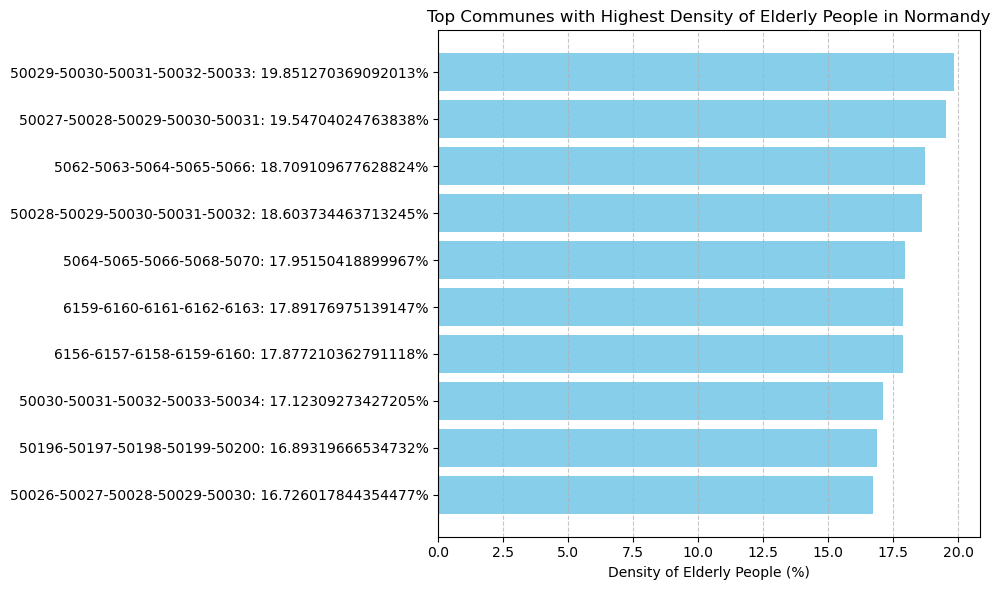

In [95]:
import matplotlib.pyplot as plt

# Top communes and their densities
top_communes = top_combinations
densities = top_densities

# Plotting
plt.figure(figsize=(10, 6))
plt.barh(range(len(top_communes)), densities, color='skyblue')
plt.yticks(range(len(top_communes)), [f"{'-'.join(commune)}: {density}%" for commune, density in zip(top_communes, densities)])
plt.xlabel('Density of Elderly People (%)')
plt.title('Top Communes with Highest Density of Elderly People in Normandy')
plt.gca().invert_yaxis()  # Invert y-axis to have the highest density at the top
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Display the plot
plt.tight_layout()
plt.show()


In [105]:
# Flatten the list of lists and convert to set to get unique values
unique_area_codes = set(code for sublist in top_communes for code in sublist)

# Convert the set back to a list if necessary
unique_area_codes_list = list(unique_area_codes)

In [106]:
df_codes = pd.read_csv('data/code_postal_code_insee_2015public.csv', sep=";")

In [107]:
import pandas as pd
import plotly.express as px

# Flatten the list of lists and convert to set to get unique values
unique_area_codes = set(code for sublist in top_communes for code in sublist)

# Convert the set back to a list if necessary
unique_area_codes_list = list(unique_area_codes)

# Load the dataset containing the coordinates
df_codes = pd.read_csv('data/code_postal_code_insee_2015public.csv', sep=";")

# Filter the dataset to include only the selected area codes
df_codes_top = df_codes[df_codes['INSEE_COM'].isin(unique_area_codes_list)]

# Split 'Geo Point' column into separate latitude and longitude columns
df_codes_top[['latitude', 'longitude']] = df_codes_top['Geo Point'].str.split(', ', expand=True).astype(float)

# Create a scatter map plot using Plotly Express
fig = px.scatter_mapbox(df_codes_top, lat="latitude", lon="longitude", 
                        hover_name="NOM_COM", hover_data=["CODE_COM"],
                        zoom=8, height=600)

# Customize the map layout
fig.update_layout(mapbox_style="carto-positron",
                  margin={"r":0,"t":0,"l":0,"b":0})

# Show the map
fig.show()


/var/folders/gf/krd86t8n5cqdjlrv032x5d_h0000gn/T/ipykernel_78956/2190508749.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

/var/folders/gf/krd86t8n5cqdjlrv032x5d_h0000gn/T/ipykernel_78956/2190508749.py:17: SettingWithCopyWarning:


A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

